<a href="https://colab.research.google.com/github/daniyal9538/GeneralProjects/blob/master/Pandas_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Pandas for Data Analysis and Manipulation

I will be using panda to do analysis and answer some questions. The dataset uploaded is taken from "http://stat-computing.org/dataexpo/2009/2008.csv.bz2".
The questions are from a mlcourse.ai session.

I will post the questions, and a basic understanding of what the question is asking. Then i will post the code and explanation of the code itself. Explanation of the code will be in the from of comments in the code block

#Install and get dependencies

In [0]:
!pip install pandas

In [0]:
import numpy as np
import pandas as pd
# pip install seaborn 
#import seaborn as sns
import matplotlib.pyplot as plt

#Upload file

Run this code block to upload the downloaded file from your local pc on to this notebook

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
 

#Load file into a pandas dataframe

The first thing we need to do is specify what data do we want to work with from our dataset. The datafile is in the form of a csv file, and it represents a table. Each row is 1 entry and has multiple columns. Each columns describes some attribute of the data. We do not need all those attributes, hence we first describe a variable which specifies which columns we want and what the data types of those values are. The names of the values and columns have to be exactly the same.
We will store this infromation in a variable called dtype. This variable is a python dict.

In [0]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

Next we load the csv file into a pandas dataframe. We specify the 'path', or the name of the file, and store it into a variable called fdf (flights-dataframe), and we pass in this value to the read_csv function
We also pass in the 2 other parameters. Th first parameter, usecols, specifies which colomuns we want from our csv file, we specify that we want the keys (column names) from our dtype variables. The second parameter is dtype, it specifies the type of those values. I.e, whether to store the values as string or integers or floats.

In [0]:
%%time
# change the path if needed
#the file is compressed but pandas will decompress it itself, no need to deconpress the file seperately
path = '2008.csv.bz2'
fdf = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 41.5 s, sys: 721 ms, total: 42.2 s
Wall time: 42.2 s


We should find out what our data looks like. Read along in the comments in the code block below.

In [0]:
print(fdf.shape) 
#this will give us the 'length'and 'width' of our table, i.e, the number of rows and columns
#the number of rows define the number of enteries in the table, the number of columns are the number of attributes of each entry 
#Which is the same as the number of columsn we specified in our dtype variable"""
print(fdf.columns) 
#This will show us what columns we have in our table, this should be the same as the ones we defined in our dtype variable"""

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


Next we can print out the first 5 values of our table to see what our table actually looks like

In [0]:
fdf.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


It's hard to see all the data in one window withouth scrolling, to make it easier to see we will transpose this table. What this means is that we will switch the place of the columsn and rows

In [0]:
fdf.head(5).T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


A Quick Note: NaN means that the data for the entry in that table is not available, or that it simple does not exist. It is not the same as 0. 0 is a value that relays some data. NaN means that there is no value and that entry contains no data.

#Q 1

1. How many unique carriers are there in our dataset?

We need to find how many carriers (Airline carriers) are present in our dataset

In [0]:
fdf['UniqueCarrier'].nunique()
#We specify which attribute (column) we are looking at, and the nunique function returns the number of unique entries in the table in that specific table

20

#Q 2

2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference? 

We need to count the total number of cancalled flights and not cancelled flights. If the cancelled value in an entry is 0 that means it wasnt cancelled, if it was 1 that means it was cancelled

In [0]:
cancelled = fdf.loc[fdf['Cancelled'] == 1]
# First we filted in all the cancelled flighs into a new dataframe, the loc function locates the rows which matches the criterea in the bracket
notCancelled = fdf.loc[fdf['Cancelled'] == 0]
#We do the same for flights that arent cancelled

print ('Number of cancelled flights: {}, Number of not cancelled flights: {}, Difference between not cancelled and cancelled: {}'.format(
    len(cancelled), len(notCancelled), len(notCancelled) - len(cancelled)))
#the len() function tells us the number of rows in each dataframe, as each row corrosoponds to 1 flight, number of rows is the number of flights


Number of cancelled flights: 137434, Number of not cancelled flights: 6872294, Difference between not cancelled and cancelled: 6734860


#Q 3

3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

 find the 2 flights with longest departure and arrival delays, and for each of thos flights we need to check what their destination airport is

In [0]:
mDepDelay = fdf.loc[fdf['DepDelay'].idxmax()]['Dest']
#We first find the row which contains the max value in the column DepDelay, the idxmax function does this for us, then we specify which column from that row we want
#If we dont specify this column then the function will return the whole row

mArrDelay = fdf.loc[fdf['ArrDelay'].idxmax()]['Dest']
#Do the same for ArrDelay

print('Destination airport for flight with longest departure delay: {} \nDestination airport for flight with longest arrivale delay: {} '.format(mDepDelay, mArrDelay))

Destination airport for flight with longest departure delay: MSP 
Destination airport for flight with longest arrivale delay: MSP 


#Q 4

4. Find the carrier that has the greatest number of cancelled flights.

Filter in all the flights that are cancelled and find the carrier with the max amount of flights. 

In [0]:
fdf.groupby(['UniqueCarrier'])['Cancelled'].sum().sort_values(
    ascending=False).iloc[0:1]
#the groupby function groups all the rows by the specified attribute (UniqueCarriers), then we specify which other attribute we want to analyse (Cancelled)
#then we specify what we want from that attribute, we want to count the total number of occurances of cancelled, and as cancelled is always 1 when a flight is cancelled
#summing the cancelled attribute for each carrier should tell us the total number of cancelled flights for each carrier
#then we sort the values in descending order (biggest to smallest), and then we specify which of the values we want to output using the iloc function
#for this case we only want the 1st value
#The output will be the carrier and the number of cancelled flights

UniqueCarrier
MQ    18331.0
Name: Cancelled, dtype: float64

#Q 5

5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?

For this we need to first create a new column which contains the departure hour of each flight, and then we need to find out the hour that has the most number of flights

In [0]:
fdf['DepHour'] = fdf['DepTime'] // 100
#First we create a new column called dephour and convert the deptime value from the deptime column to the hour of day
#to do this we simple divide the deptime value by hour and apply the floor function, thiw will round up and fraction values
fdf['DepHour'].replace(to_replace=24, value=0, inplace=True)
#our dephour will contain values from 1 to 24, however, the hour 24 does not exist, after 23 00, the clock rolls over to 00 00. hence we rplace all the 24 values with 0
#you can check the table again by running fdf.head(5).T function to see the new column

hour with the highest percentage of flights 8.0


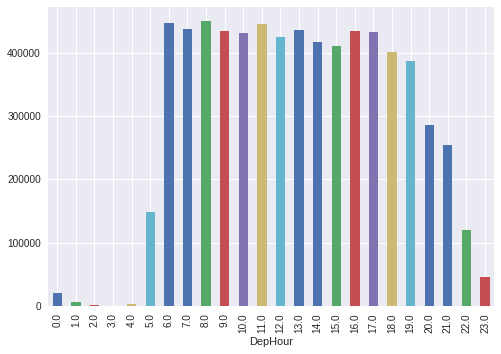

In [0]:
print('hour with the highest percentage of flights',fdf.groupby('DepHour').size().idxmax())
#we group all the flights by dep hour and simply count the number of flights in each hour, and find the hour with the most flights
fdf.groupby('DepHour').size().plot(kind='bar')
#We can also plot this data in a bar graph to see a visual representation of the data

#Q 6

6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?

We do the same thing as we did above, but we need to filter out the cancelled flights and find the ratio of cancelled flight to total flights for each hour

hour with the lowest percentage of cancelled flights 3.0


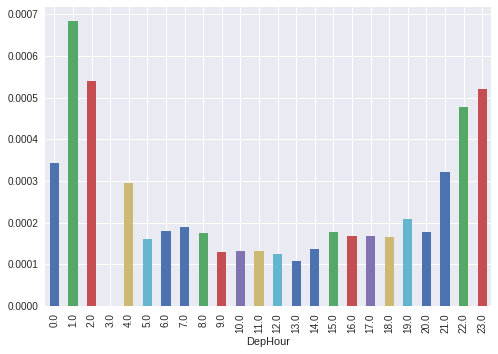

In [0]:
totalFlights = fdf.groupby('DepHour').size()
#returns a series of the values of the total number of flights for each hour
cancelledFlights = fdf.groupby(['DepHour'])['Cancelled'].sum()
#returns a series of the values of the total number of cancalled flights for each hour
percentages = (cancelledFlights)/totalFlights
print('hour with the lowest percentage of cancelled flights', percentages.idxmin())
#prints out the hour with the lowest percentage of cancelled flights
percentages.plot(kind='bar')
#lets plot the data as well

#Q 7

7. Is there any hour that didn't have any cancelled flights at all?

Look for hour where the number of cancelled flights  = 0

DepHour
0.0      7
1.0      4
2.0      1
3.0      0
4.0      1
5.0     24
6.0     80
7.0     83
8.0     79
9.0     56
10.0    57
11.0    59
12.0    53
13.0    47
14.0    57
15.0    73
16.0    73
17.0    73
18.0    66
19.0    81
20.0    51
21.0    82
22.0    57
23.0    24
Name: Cancelled, dtype: uint8


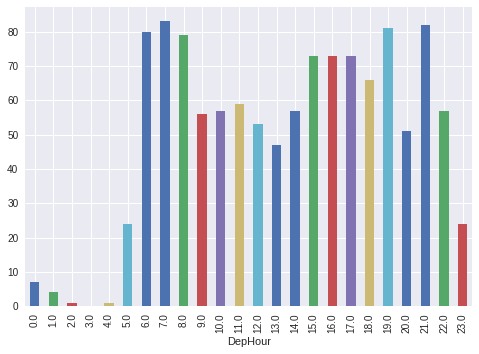

In [0]:
print(fdf.groupby(['DepHour'])['Cancelled'].sum())
#this will print out the number of cancelled flights for each hour, and then we can see which hours have no cancelled flight
fdf.groupby(['DepHour'])['Cancelled'].sum().plot(kind='bar')
#plot the data as well

#Q 8

8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

For this we need to find out the hour with the max amount of departed flights, which means that we only need to consider not cancelled, or completed flights

The hour with the most completed (not cancelled) flights:  8.0


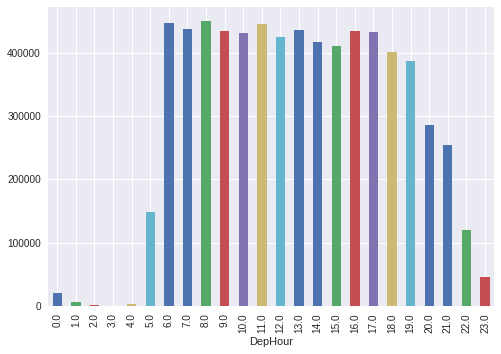

In [0]:
notCancelled = fdf.loc[fdf['Cancelled'] == 0]
#first we filiter in all the flights that werent cancelled
print('The hour with the most completed (not cancelled) flights: ', notCancelled.groupby(['DepHour']).size().idxmax())
#group flights by hour and select the hour with the max amount of flights
notCancelled.groupby(['DepHour']).size().plot(kind='bar')
#display data in graph

#Q 9

9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?

We need to filter in all the completed flights and then avg out the the departure delay for each hour, and then find the hour which has the lowest avergae value. If the value is negative, it means the flight arrived earlier than expected

In [0]:
notCancelled = fdf.loc[fdf['Cancelled'] == 0]
#first we filiter in all the flights that werent cancelled
avg = notCancelled.groupby(['DepHour'])['DepDelay'].mean()
#calculate the averages of the departure delay for each hour
avg[avg<0]
#output the hours and values with averages less than 0

DepHour
5.0   -4.253906
6.0   -1.629883
Name: DepDelay, dtype: float16

#Q 10

10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

The carrier found in Q 4 was MQ. We need to filter in all flights by MQ, and then filter in all the completed flights. Then group the flights by departure hour and see which hour has greatest number of departures. 

The hour witht the greatest number of departed fligths for MQ:  10.0


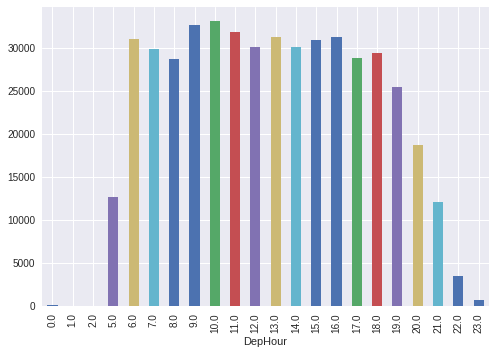

In [0]:
MQ =  fdf.loc[fdf['UniqueCarrier'] == 'MQ']
#Filter in all the flights by MQ
notCancelled = MQ.loc[MQ['Cancelled'] == 0]
#Filter in all the completed flights

print('The hour witht the greatest number of departed fligths for MQ: ', notCancelled.groupby('DepHour').size().idxmax())

notCancelled.groupby('DepHour').size().plot(kind='bar')

#To visualize the distribution we can plot it




#Q 11

11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

Filter flights by Cancelled  = 0, then group by carriers and then sort in descending order and select the top 10

In [0]:
notCancelled = fdf.loc[fdf['Cancelled'] == 0]
#filter in all completed flights

notCancelled.groupby(['UniqueCarrier']).size().sort_values(ascending=False).iloc[0:10]
#group by carreirs, sort by value, and display top 10

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

#Q 12

12. Plot distributions of flight cancellation reasons (CancellationCode).What is the most frequent reason for flight cancellation? 

First we filter in all the cancelled flights and group by cancelleation code, then we can plot the distribution and find the max value of cancellation reaons

The most common cancellation reason is:  B


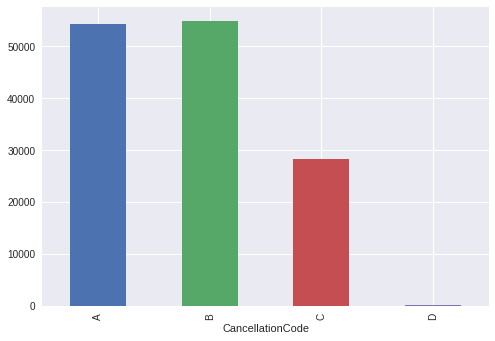

In [0]:
cancelled = fdf.loc[fdf['Cancelled'] == 1]
#filter in all cancelled flights

cancelled.groupby('CancellationCode').size().plot(kind='bar')
#display distribution in plot
print('The most common cancellation reason is: ', cancelled.groupby('CancellationCode').size().idxmax())

#Q 13

13. Which route is the most frequent, in terms of the number of flights?

For this we will create a new entry called route. We will concatenate the values from the origin and dest. After that we will group the flights by route and find the route with max amount of flights

In [0]:
fdf['Route'] = fdf['Origin'] + fdf['Dest'] 
#create new column in dataframe

print('The Route with the most amount of flights: {}, with {} flights'.format(fdf.groupby('Route').size().idxmax(), fdf.groupby('Route').size().max()))
#print out results



The Route with the most amount of flights: SFOLAX, with 13788 flights


#Q 14


14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay

First we filter in alll the flights that were delayed, then we group by routes, sort and then select the flights that belong to the top 5 routes. Then we filter in all the flights that were affected due to weather conditions and count the number of flights

In [0]:
#you could manually see which routes were delayed the most and then select each route and just manully add all the flights that were delayed due to weather conditions for those routes
#i wanted to answer it programatically
#there might be other ways to do it, but this way popped into my head first

n = 5 #select the top n delayed routes

delayed = fdf.loc[fdf['DepDelay'] > 0]
#filter in all flights that were delayed at departure

topRoutes = delayed.groupby(['Route']).size().sort_values(ascending=False).iloc[0:n]
#group flights by route then sort them in decreasing order and select the top 5
#the values return is in the form of a panda series, which is like a python dictionay, we want the key values from this series
df = pd.DataFrame()
l = []

for i in topRoutes.keys():
  #we go through all the key values in series (routes with the most departure delayes), and only select the flights that were delayed and belong to these routes
  #each time we filter the flights, a new dataframe is created, we add all the dataframes to a list
  l.append(delayed.loc[delayed["Route"] == i])

df = pd.concat(l) #we concatonate all dataframes into 1 big dataframe


wDelay = df.loc[df['WeatherDelay']> 0]
#we filter in flights that were delayed due to weather conditions

print("The number of flights that satisfies the criterea: ", len(wDelay))
#finally we get the length of this newly filtered dataframe, the length is the number of rows, each row is a flight, number of rows = number of flights

The number of flights that satisfies the criterea:  668


#Q 15

15. Examine the hourly distribution of departure times. Choose all correct statements:

  - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
  - Flights are uniformly distributed within time interval [0-23].
  - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.
  
For this question i will show how to find the distribution of departure times only. Selecting the correct statements should be done through intutiion and critical thinking

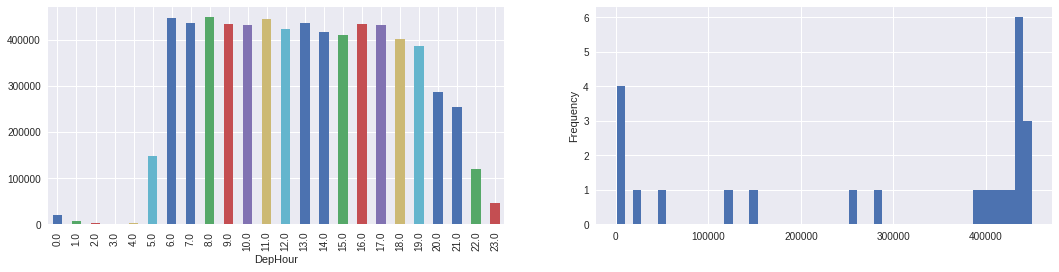

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))
fdf.groupby(['DepHour']).size().plot(kind='bar', ax=axes[0], figsize = (18, 4))
#first graph is bar chart of the number flights departing in each hour

fdf.groupby(['DepHour']).size().plot.hist(bins = 50, ax=axes[1], figsize = (18, 4))
#second graph is a histogram if the the number of departing flights

#Q 16

16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings. Choose all correct statements:

  -The number of flights during weekends is less than during weekdays (working days)
  
  -The lowest number of flights is on Sunday.
  
  -There are less flights during winter than during summer.
  
  
  For this question i will show how to plot number of flights vs days and months . Selecting the correct statements should be done through intutiion and critical thinking

In [0]:
flight = pd.crosstab(fdf.Month, fdf.DayOfWeek)
#returns a new table that displayes how many flights for each month for each day of the week
flight

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


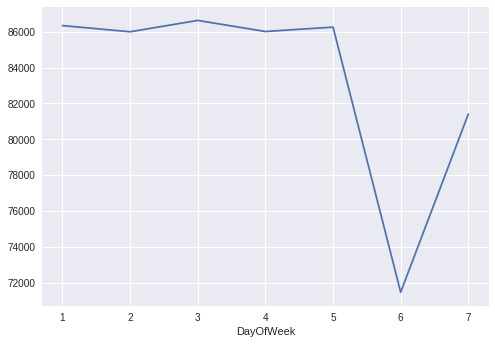

In [0]:
flight.mean().plot()
#plot the average number of flights on each day

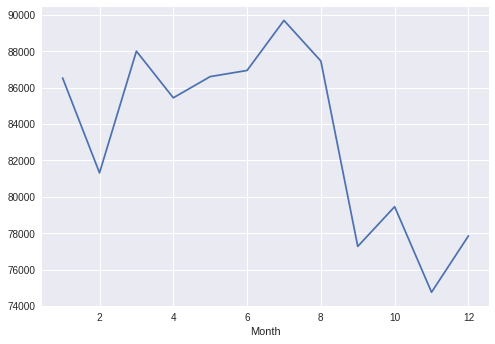

In [0]:
flight.T.mean().plot()
#Plot the mean number of flights in each month, to do this we first transponse our table so that we average out flights per month instead of flights per day of week

#Q 17

17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months. Choose all correct statements:

  October has the lowest number of cancellations due to weather.
  
  The highest number of cancellations in September is due to Security reasons.

  April's top cancellation reason is carriers.

  Flights cancellations due to National Air System are more frequent than those due to carriers.
  
For this question i will show how to plot number cancellation reasons vs months . Selecting the correct statements should be done through intutiion and critical thinking
To get the cancellation code meanings, visit [link](https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Specifies%20The%20Reason%20For%20Cancellation&Field_Type=Char&Lookup_Table=L_CANCELLATION&Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&Sys_Field_Name=CANCELLATION_CODE)
   

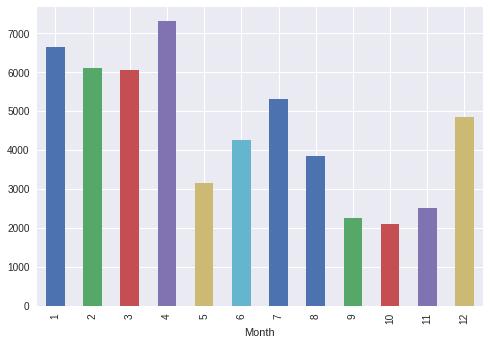

In [0]:
cancellationA = fdf.loc[fdf['CancellationCode'] == 'A']
cancellationA.groupby(['Month']).size().plot(kind='bar')
#Filter in all flights with cancellation code A and plot the number of flights vs months

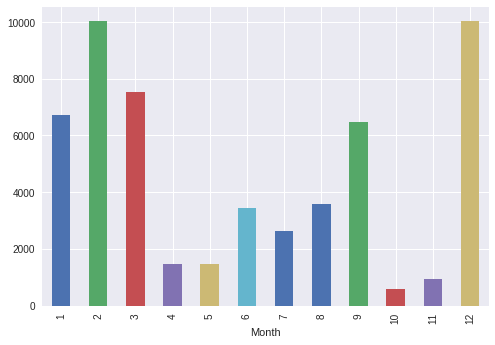

In [0]:
cancellationB = fdf.loc[fdf['CancellationCode'] == 'B']
cancellationB.groupby(['Month']).size().plot(kind='bar')
#Filter in all flights with cancellation code B and plot the number of flights vs months

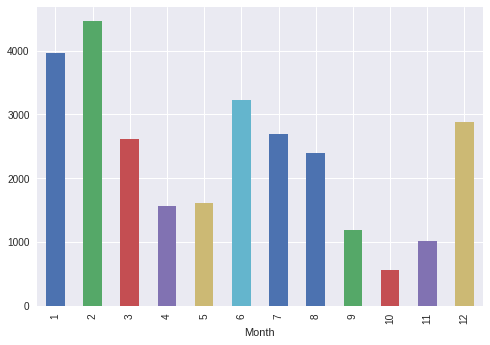

In [0]:
cancellationC = fdf.loc[fdf['CancellationCode'] == 'C']
cancellationC.groupby(['Month']).size().plot(kind='bar')
#Filter in all flights with cancellation code A and plot the number of flights vs months

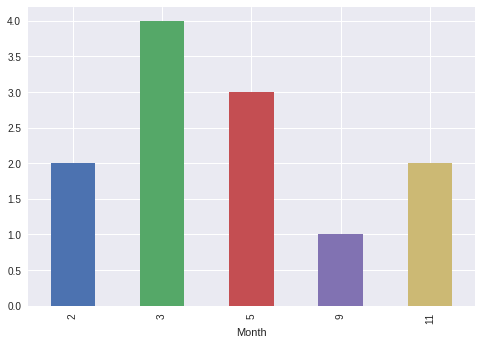

In [0]:
cancellationD = fdf.loc[fdf['CancellationCode'] == 'D']
cancellationD.groupby(['Month']).size().plot(kind='bar')
#Filter in all flights with cancellation code A and plot the number of flights vs months

#Q 18

18. Which month has the greatest number of cancellations due to Carrier(CancellationCode = A)?

From the above graphs, we can see that the 4th month (May) has the most cancellations due to Carreirs.

#Q 19

19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

We can do this by grouping all the flights that were cancelled due to carriers in may by carrier ids, and then find the carreir with the max number of cancellations. From the previous question we know the corrosponding month is the 4th Month

In [0]:
#we have already filtered flights that have cancellation code A

cancelledFlights = cancellationA.loc[cancellationA['Month'] == 4]
#filter in all cancelled flights that happened in may

cancelledFlights.groupby('UniqueCarrier').size().idxmax()
#group flight by carrier ids and output the carrier with the most cancelled flights and output result

'AA'